# Predicting Student's Performance and SAT/ACT result

## Using the model from satact-campus-data-class-2021



In [1]:
#These are the libaray that was use for the car crash. I need to check closely with the data and see which of the libaries will beneifit the result of the topic. 
#These are libaray for the start but I may add new library, delete some of the library, or keep the library that is necessary for the project
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from kmodes.kmodes import KModes

#Ploty Packages
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go

#Mathplotlib
import matplotlib.pyplot as plt
from string import ascii_letters

#Statistical Libraries 
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
%matplotlib inline

#Interative Map 
from bokeh.plotting import figure, show 
from bokeh.io import output_notebook 

# SAT/ACT Campus Level 

In [2]:
ty = pd.read_csv('Downloads/SATTexas2021campus.csv')
ty.fillna(method= 'ffill', inplace=True)
print(ty.head())
result = ty.dtypes
print(result)

              Group   Campus  AICode    CampName  District    DistName  \
0      All Students  1902001  441165  Cayuga H S      1902  Cayuga ISD   
1  African American  1902001  441165  Cayuga H S      1902  Cayuga ISD   
2   American Indian  1902001  441165  Cayuga H S      1902  Cayuga ISD   
3             Asian  1902001  441165  Cayuga H S      1902  Cayuga ISD   
4          Hispanic  1902001  441165  Cayuga H S      1902  Cayuga ISD   

   County         CntyName  Region RegnName    ERW   Math  Total Grads_Mskd  \
0       1  Anderson County       7  Kilgore  503.0  476.0  980.0        <50   
1       1  Anderson County       7  Kilgore  503.0  476.0  980.0        <25   
2       1  Anderson County       7  Kilgore  503.0  476.0  980.0        <25   
3       1  Anderson County       7  Kilgore  503.0  476.0  980.0        <25   
4       1  Anderson County       7  Kilgore  467.0  433.0  900.0        <25   

  Exnees_Mskd  Part_Rate Crit_Mskd  Above_Crit_Rate TSI_Both_Mskd  \
0         <

In [3]:
rt = pd.read_csv('Downloads/ACTTexas2021campus.csv')
rt.fillna(method= 'ffill', inplace=True)
print(rt.head())
result = rt.dtypes
print(result)

              Group   Campus  AICode     CampName  District     DistName  \
0      All Students  1903001  442190  Elkhart H S      1903  Elkhart ISD   
1  African American  1903001  442190  Elkhart H S      1903  Elkhart ISD   
2   American Indian  1903001  442190  Elkhart H S      1903  Elkhart ISD   
3             Asian  1903001  442190  Elkhart H S      1903  Elkhart ISD   
4          Hispanic  1903001  442190  Elkhart H S      1903  Elkhart ISD   

   County         CntyName  Region RegnName  ...  Reading  Science  Compos  \
0       1  Anderson County       7  Kilgore  ...     20.0     22.5    20.5   
1       1  Anderson County       7  Kilgore  ...     20.0     22.5    20.5   
2       1  Anderson County       7  Kilgore  ...     20.0     22.5    20.5   
3       1  Anderson County       7  Kilgore  ...     20.0     22.5    20.5   
4       1  Anderson County       7  Kilgore  ...     20.0     22.5    20.5   

   Grads_Mskd  Exnees_Mskd Part_Rate Crit_Mskd  Above_Crit_Rate TSI_Both_M

In [4]:
ct = pd.read_csv('Downloads/SATACTTexas2021campus.csv')
ct.fillna(method= 'ffill', inplace=True)
print(ct.head())
results = ct.dtypes
print(results)

              Group   Campus  AICode    CampName  District    DistName  \
0      All Students  1902001  441165  Cayuga H S      1902  Cayuga ISD   
1  African American  1902001  441165  Cayuga H S      1902  Cayuga ISD   
2   American Indian  1902001  441165  Cayuga H S      1902  Cayuga ISD   
3             Asian  1902001  441165  Cayuga H S      1902  Cayuga ISD   
4          Hispanic  1902001  441165  Cayuga H S      1902  Cayuga ISD   

   County         CntyName  Region RegnName Grads_Mskd Exnees_Mskd  Part_Rate  \
0       1  Anderson County       7  Kilgore        <50         <25       58.3   
1       1  Anderson County       7  Kilgore        <25         <25       50.0   
2       1  Anderson County       7  Kilgore        <25         <25       50.0   
3       1  Anderson County       7  Kilgore        <25         <25       50.0   
4       1  Anderson County       7  Kilgore        <25         <25      100.0   

  Crit_Mskd  Above_Crit_Rate TSI_Both_Mskd  Above_TSI_Both_Rate  
0 

In [5]:
#Merging SAT, ACT, SAT/ACT Campus Level DistName,County,CntyName,Region,RegnName
#Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate

c = pd.merge(pd.merge(ty,rt,on=['Group','Campus','CampName','AICode','District','DistName','County','CntyName','Region','RegnName','Grads_Mskd','Exnees_Mskd','Part_Rate','Crit_Mskd','Above_Crit_Rate','TSI_Both_Mskd','Above_TSI_Both_Rate']),ct,on=['Group','Campus','CampName','AICode','District','DistName','County','CntyName','Region','RegnName','Grads_Mskd','Exnees_Mskd','Part_Rate','Crit_Mskd','Above_Crit_Rate','TSI_Both_Mskd','Above_TSI_Both_Rate'])
print(c.fillna(method='ffill', inplace =True))
c.drop(['AICode','CampName','CntyName','DistName','County','RegnName','Part_Rate','Crit_Mskd','Grads_Mskd','TSI_Both_Mskd','Exnees_Mskd'],axis=1,inplace=True)
c.rename(columns={"Math_x":"SAT_Math","Math_y":"ACT_Math","ERW":"SAT_Reading"}, inplace=True)
print(c)
c.isnull().values.any()

None
                 Group     Campus  District  Region  SAT_Reading  SAT_Math  \
0                Asian    2901001      2901      18        525.0     516.0   
1          Multiracial   13901001     13901       2        580.0     530.0   
2    Missing Ethnicity   13901001     13901       2        580.0     530.0   
3                Asian   14908001     14908      12        583.0     559.0   
4      American Indian   15907023     15907      20        588.0     573.0   
..                 ...        ...       ...     ...          ...       ...   
220         Special Ed  236902008    236902       6        490.0     475.0   
221            Migrant  240901002    240901       1        555.0     605.0   
222   African American  252901001    252901       9        535.0     529.0   
223    American Indian  252901001    252901       9        535.0     529.0   
224              Asian  252901001    252901       9        535.0     529.0   

      Total  Above_Crit_Rate  Above_TSI_Both_Rate  English

False

# SAT/ ACT District Data

In [6]:
sa = pd.read_csv('Downloads/SATTexas2021district.csv')
sa.fillna(method= 'ffill', inplace=True)
print(sa.head())
result = sa.dtypes
print(result)

              Group  District    DistName  County         CntyName  Region  \
0      All Students      1902  Cayuga ISD       1  Anderson County       7   
1  African American      1902  Cayuga ISD       1  Anderson County       7   
2   American Indian      1902  Cayuga ISD       1  Anderson County       7   
3             Asian      1902  Cayuga ISD       1  Anderson County       7   
4          Hispanic      1902  Cayuga ISD       1  Anderson County       7   

  RegnName    ERW   Math  Total Grads_Mskd Exnees_Mskd  Part_Rate Crit_Mskd  \
0  Kilgore  503.0  476.0  980.0        <50         <25       58.3       <25   
1  Kilgore  503.0  476.0  980.0        <25         <25       50.0       <25   
2  Kilgore  503.0  476.0  980.0        <25         <25       50.0       <25   
3  Kilgore  503.0  476.0  980.0        <25         <25       50.0       <25   
4  Kilgore  467.0  433.0  900.0        <25         <25      100.0       <25   

   Above_Crit_Rate TSI_Both_Mskd  Above_TSI_Both_Rate  


In [7]:
er = pd.read_csv('Downloads/ACTTexas2021district.csv')
er.fillna(method= 'ffill', inplace=True)
print(er.head())
result = er.dtypes
print(result)

              Group  District     DistName  County         CntyName  Region  \
0      All Students      1903  Elkhart ISD       1  Anderson County       7   
1  African American      1903  Elkhart ISD       1  Anderson County       7   
2   American Indian      1903  Elkhart ISD       1  Anderson County       7   
3             Asian      1903  Elkhart ISD       1  Anderson County       7   
4          Hispanic      1903  Elkhart ISD       1  Anderson County       7   

  RegnName  English  Math  Reading  Science  Compos Grads_Mskd Exnees_Mskd  \
0  Kilgore     20.0  19.0     20.0     22.5    20.5       <100         <25   
1  Kilgore     20.0  19.0     20.0     22.5    20.5        <25         <25   
2  Kilgore     20.0  19.0     20.0     22.5    20.5        <25         <25   
3  Kilgore     20.0  19.0     20.0     22.5    20.5        <25         <25   
4  Kilgore     20.0  19.0     20.0     22.5    20.5        <25         <25   

   Part_Rate Crit_Mskd  Above_Crit_Rate TSI_Both_Mskd  A

In [8]:
tt = pd.read_csv('Downloads/SATACTTexas2021district.csv')
tt.fillna(method= 'ffill', inplace=True)
print(tt.head())
results = tt.dtypes
print(results)

              Group  District    DistName  County         CntyName  Region  \
0      All Students      1902  Cayuga ISD       1  Anderson County       7   
1  African American      1902  Cayuga ISD       1  Anderson County       7   
2   American Indian      1902  Cayuga ISD       1  Anderson County       7   
3             Asian      1902  Cayuga ISD       1  Anderson County       7   
4          Hispanic      1902  Cayuga ISD       1  Anderson County       7   

  RegnName Grads_Mskd Exnees_Mskd  Part_Rate Crit_Mskd  Above_Crit_Rate  \
0  Kilgore        <50         <25       58.3       <25             19.0   
1  Kilgore        <25         <25       50.0       <25             19.0   
2  Kilgore        <25         <25       50.0       <25             19.0   
3  Kilgore        <25         <25       50.0       <25             19.0   
4  Kilgore        <25         <25      100.0       <25             19.0   

  TSI_Both_Mskd  Above_TSI_Both_Rate  
0           <25                 19.0  
1 

In [9]:
#Merging SAT, ACT, SAT/ACT District Level

d = pd.merge(pd.merge(sa,er,on=['Group','District','DistName','County','CntyName','Region','RegnName','Grads_Mskd','Exnees_Mskd','Part_Rate','Crit_Mskd','Above_Crit_Rate','TSI_Both_Mskd','Above_TSI_Both_Rate']),tt,on=['Group','District','DistName','County','CntyName','Region','RegnName','Grads_Mskd','Exnees_Mskd','Part_Rate','Crit_Mskd','Above_Crit_Rate','TSI_Both_Mskd','Above_TSI_Both_Rate'])
print(d.fillna(method='ffill', inplace =True))
d.drop(['CntyName','DistName','County','RegnName','Part_Rate','Crit_Mskd','Grads_Mskd','TSI_Both_Mskd','Exnees_Mskd'],axis=1,inplace=True)
d.rename(columns={"Math_x":"SAT_Math","Math_y":"ACT_Math","ERW":"SAT_Reading"}, inplace=True)
print(d)
d.isnull().values.any()

None
                 Group  District  Region  SAT_Reading  SAT_Math   Total  \
0                Asian      2901      18        525.0     516.0  1041.0   
1          Multiracial     13901       2        580.0     530.0  1110.0   
2    Missing Ethnicity     13901       2        580.0     530.0  1110.0   
3                Asian     14908      12        583.0     559.0  1142.0   
4          Multiracial     17901      17        626.0     563.0  1189.0   
..                 ...       ...     ...          ...       ...     ...   
156    American Indian    227913      13        520.0     472.0   992.0   
157             Gifted    229901       5        590.0     465.0  1055.0   
158   African American    252901       9        535.0     529.0  1065.0   
159    American Indian    252901       9        535.0     529.0  1065.0   
160              Asian    252901       9        535.0     529.0  1065.0   

     Above_Crit_Rate  Above_TSI_Both_Rate  English  ACT_Math  Reading  \
0              100.0 

False

In [10]:
d.to_csv('d.csv', index=False)
c.to_csv('c.csv', index=False)

# Check for missing data

In [11]:
#Visuallization
import missingno as msno

<AxesSubplot:>

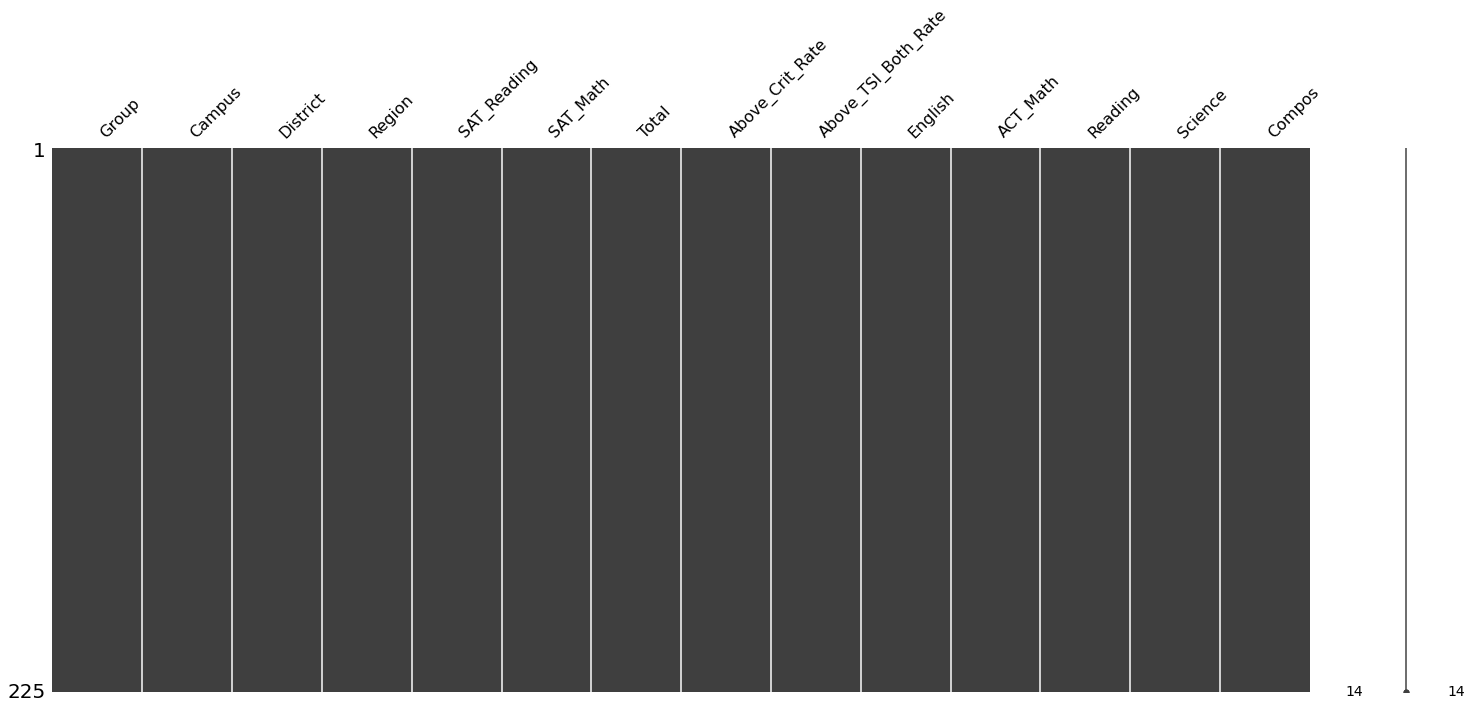

In [12]:
#Check if there is missing data in the SAT/ACT district
msno.matrix(c)

<AxesSubplot:>

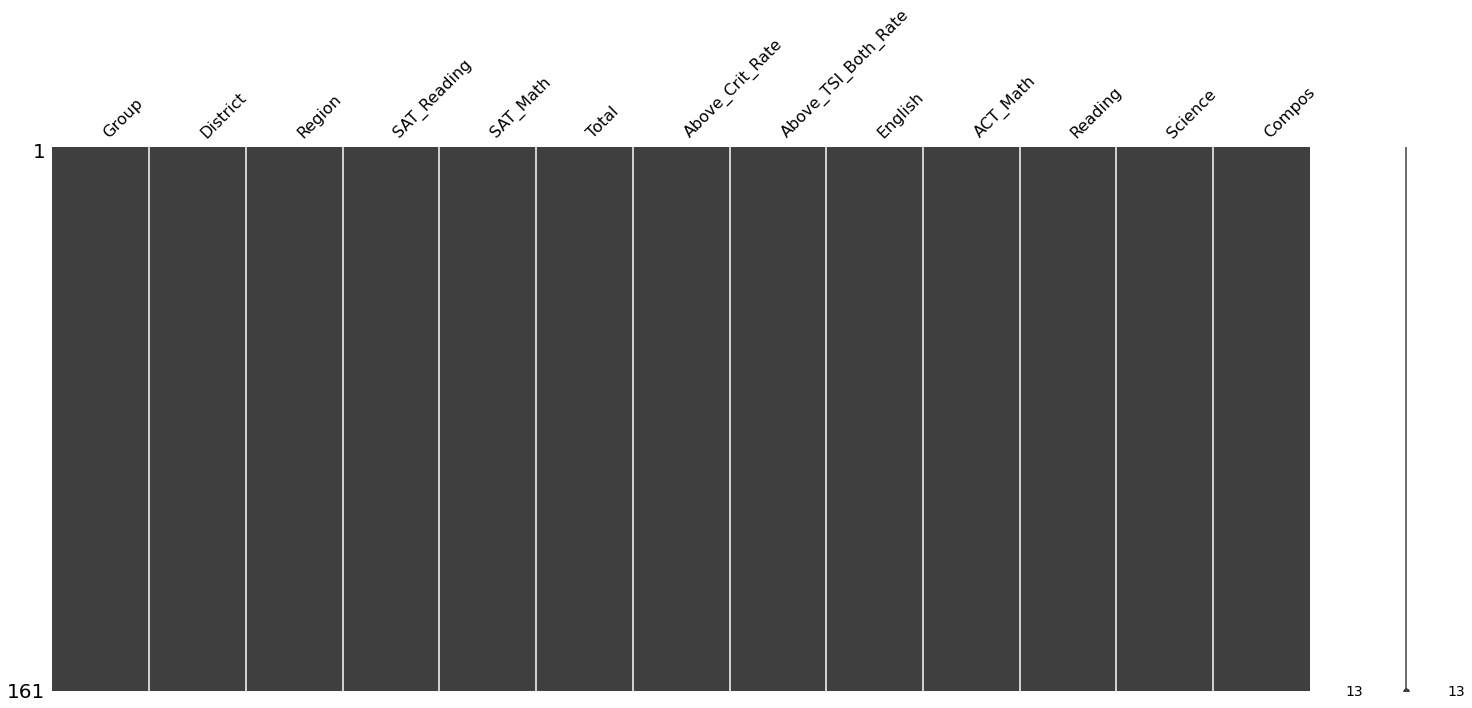

In [13]:
msno.matrix(d)

# Descriptive Stats of Distrcit Level

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
print(d.shape)
print(d.info())

(161, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Group                161 non-null    object 
 1   District             161 non-null    int64  
 2   Region               161 non-null    int64  
 3   SAT_Reading          161 non-null    float64
 4   SAT_Math             161 non-null    float64
 5   Total                161 non-null    float64
 6   Above_Crit_Rate      161 non-null    float64
 7   Above_TSI_Both_Rate  161 non-null    float64
 8   English              161 non-null    float64
 9   ACT_Math             161 non-null    float64
 10  Reading              161 non-null    float64
 11  Science              161 non-null    float64
 12  Compos               161 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 17.6+ KB
None


In [16]:
d.describe(include='all')

,Group,District,Region,SAT_Reading,SAT_Math,Total,Above_Crit_Rate,Above_TSI_Both_Rate,English,ACT_Math,Reading,Science,Compos
count,161,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
unique,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Gifted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,93505.913043,10.664596,574.173913,554.906832,1129.086957,94.731056,95.041615,23.819876,23.398137,26.223602,24.393789,24.523602
std,NaN,66533.835069,3.771512,71.036132,77.375206,145.117814,17.345314,16.983255,5.430548,4.144250,5.374704,4.104018,4.610877
min,NaN,2901.000000,1.000000,365.000000,385.000000,750.000000,20.000000,20.000000,11.000000,13.300000,15.300000,14.300000,13.700000
25%,NaN,39905.000000,9.000000,523.000000,497.000000,1026.000000,100.000000,100.000000,19.300000,19.900000,21.800000,21.000000,20.600000
50%,NaN,61906.000000,9.000000,585.000000,548.000000,1110.000000,100.000000,100.000000,23.300000,22.300000,25.800000,23.500000,23.800000
75%,NaN,137904.000000,12.000000,643.000000,630.000000,1273.000000,100.000000,100.000000,30.000000,28.000000,32.000000,29.000000,29.700000


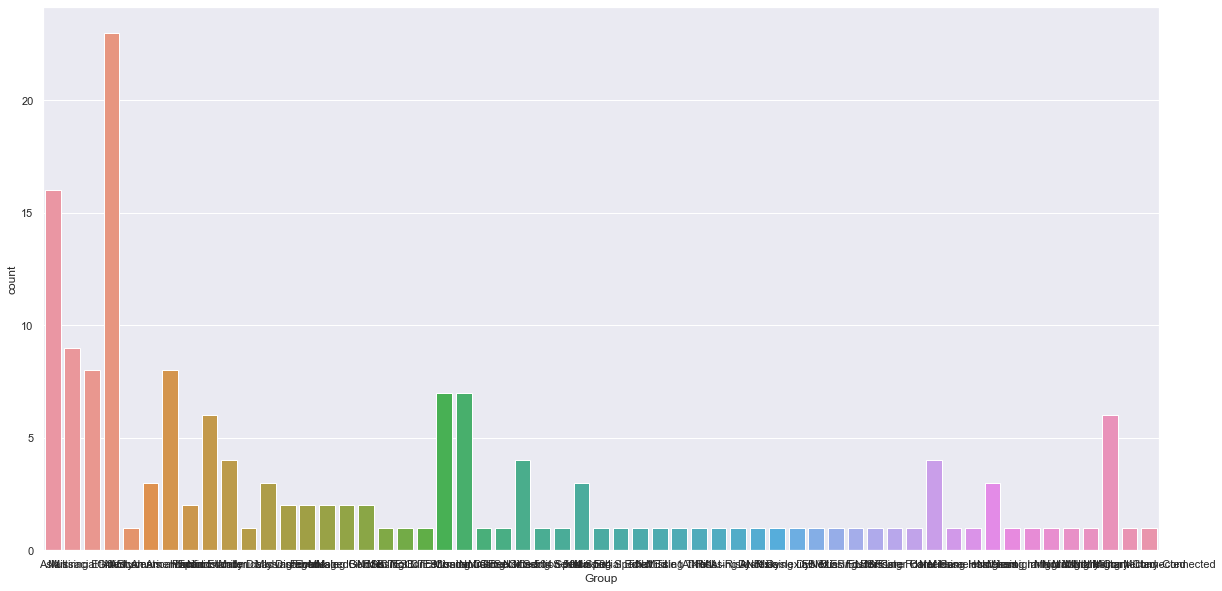

In [17]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Group', data=d)

# Descriptive Stats of Campus Level

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
print(c.shape)
print(c.info())

(225, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Group                225 non-null    object 
 1   Campus               225 non-null    int64  
 2   District             225 non-null    int64  
 3   Region               225 non-null    int64  
 4   SAT_Reading          225 non-null    float64
 5   SAT_Math             225 non-null    float64
 6   Total                225 non-null    float64
 7   Above_Crit_Rate      225 non-null    float64
 8   Above_TSI_Both_Rate  225 non-null    float64
 9   English              225 non-null    float64
 10  ACT_Math             225 non-null    float64
 11  Reading              225 non-null    float64
 12  Science              225 non-null    float64
 13  Compos               225 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 26.4+ KB
None


In [20]:
import pandas as pd
c['Compos'] = pd.to_numeric(c['Compos'], errors='coerce')
c['Total'] = pd.to_numeric(c['Total'], errors='coerce')
c['English'] = pd.to_numeric(c['English'], errors='coerce')
c['SAT_Math'] = pd.to_numeric(c['SAT_Math'], errors='coerce')
c['Above_Crit_Rate'] = pd.to_numeric(c['Above_Crit_Rate'], errors='coerce')
c['Above_TSI_Both_Rate'] = pd.to_numeric(c['Above_TSI_Both_Rate'], errors='coerce')
c['ACT_Math'] = pd.to_numeric(c['ACT_Math'], errors='coerce')
c['Reading'] = pd.to_numeric(c['Reading'], errors='coerce')
c['Science'] = pd.to_numeric(c['Science'], errors='coerce')
print(c.dtypes)

Group                   object
Campus                   int64
District                 int64
Region                   int64
SAT_Reading            float64
SAT_Math               float64
Total                  float64
Above_Crit_Rate        float64
Above_TSI_Both_Rate    float64
English                float64
ACT_Math               float64
Reading                float64
Science                float64
Compos                 float64
dtype: object


In [21]:
c.describe(include='all')

,Group,Campus,District,Region,SAT_Reading,SAT_Math,Total,Above_Crit_Rate,Above_TSI_Both_Rate,English,ACT_Math,Reading,Science,Compos
count,225,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
unique,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Gifted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.541051e+07,95410.497778,10.266667,572.751111,556.995556,1129.706667,94.785333,95.452000,23.517333,23.254667,25.657778,24.155556,24.211556
std,NaN,6.967071e+07,69670.711863,4.431019,71.647826,76.551424,145.321574,16.983955,15.997804,5.436058,4.123776,5.329278,4.163723,4.618958
min,NaN,2.901001e+06,2901.000000,1.000000,365.000000,385.000000,750.000000,20.000000,20.000000,11.000000,13.300000,15.100000,12.500000,13.500000
25%,NaN,3.990500e+07,39905.000000,9.000000,520.000000,497.000000,1026.000000,100.000000,100.000000,19.300000,19.900000,21.700000,20.900000,20.600000
50%,NaN,6.190500e+07,61905.000000,10.000000,581.000000,552.000000,1121.000000,100.000000,100.000000,22.800000,22.400000,25.600000,23.600000,23.800000
75%,NaN,1.379040e+08,137904.000000,12.000000,643.000000,630.000000,1273.000000,100.000000,100.000000,30.000000,28.000000,32.000000,29.000000,29.700000


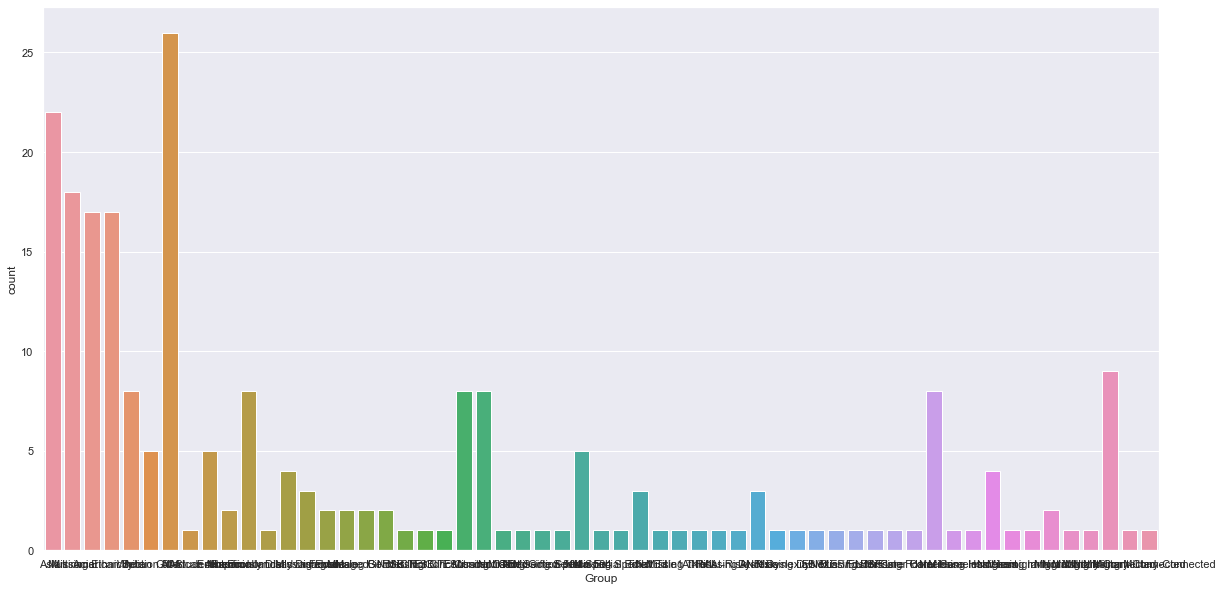

In [22]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Group', data=c)

# Checking the Correlation of the variables

In [23]:
d=d.corr()
print(d)

                     District    Region  SAT_Reading  SAT_Math     Total  \
District             1.000000  0.187070    -0.426021 -0.478505 -0.463356   
Region               0.187070  1.000000    -0.355982 -0.375102 -0.374480   
SAT_Reading         -0.426021 -0.355982     1.000000  0.912054  0.975836   
SAT_Math            -0.478505 -0.375102     0.912054  1.000000  0.979612   
Total               -0.463356 -0.374480     0.975836  0.979612  1.000000   
Above_Crit_Rate     -0.234769 -0.174247     0.112282  0.218050  0.171320   
Above_TSI_Both_Rate -0.234409 -0.190962     0.123955  0.225099  0.180794   
English             -0.585297 -0.399914     0.840724  0.837398  0.858078   
ACT_Math            -0.528799 -0.384275     0.856573  0.875699  0.886305   
Reading             -0.561241 -0.379310     0.828964  0.833898  0.850477   
Science             -0.533899 -0.387814     0.827657  0.845314  0.855975   
Compos              -0.560897 -0.391326     0.850800  0.858440  0.874267   

           

<AxesSubplot:>

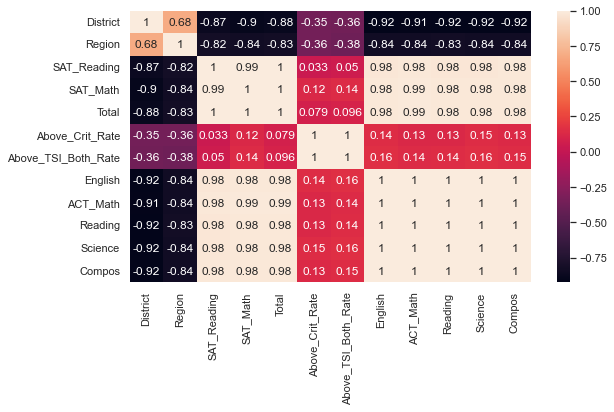

In [24]:
#Heat map of SAT/ACT District Texas 
plt.figure(figsize=(9,5))
sns.heatmap(d.corr(), annot =True)

In [25]:
c=c.corr()
print(c)

                       Campus  District    Region  SAT_Reading  SAT_Math  \
Campus               1.000000  1.000000  0.055332    -0.332445 -0.388457   
District             1.000000  1.000000  0.055332    -0.332445 -0.388457   
Region               0.055332  0.055332  1.000000    -0.165187 -0.201376   
SAT_Reading         -0.332445 -0.332445 -0.165187     1.000000  0.922611   
SAT_Math            -0.388457 -0.388457 -0.201376     0.922611  1.000000   
Total               -0.368455 -0.368455 -0.187733     0.979166  0.981711   
Above_Crit_Rate     -0.202369 -0.202369 -0.051889     0.099596  0.177757   
Above_TSI_Both_Rate -0.226361 -0.226361 -0.063905     0.121266  0.197648   
English             -0.438692 -0.438692 -0.191443     0.857430  0.834824   
ACT_Math            -0.418441 -0.418441 -0.198478     0.867368  0.875805   
Reading             -0.405456 -0.405456 -0.202562     0.838134  0.814037   
Science             -0.392011 -0.392011 -0.187803     0.846688  0.847421   
Compos      

<AxesSubplot:>

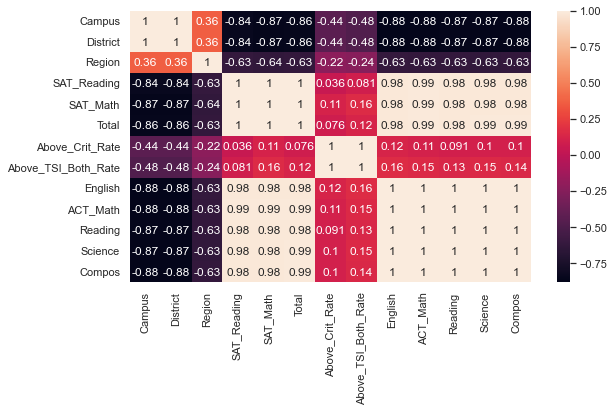

In [26]:
#Heat map of SAT/ACT Campus Texas 
plt.figure(figsize=(9,5))
sns.heatmap(c.corr(), annot =True)

# Find Pairplots for Campus and Distrisct

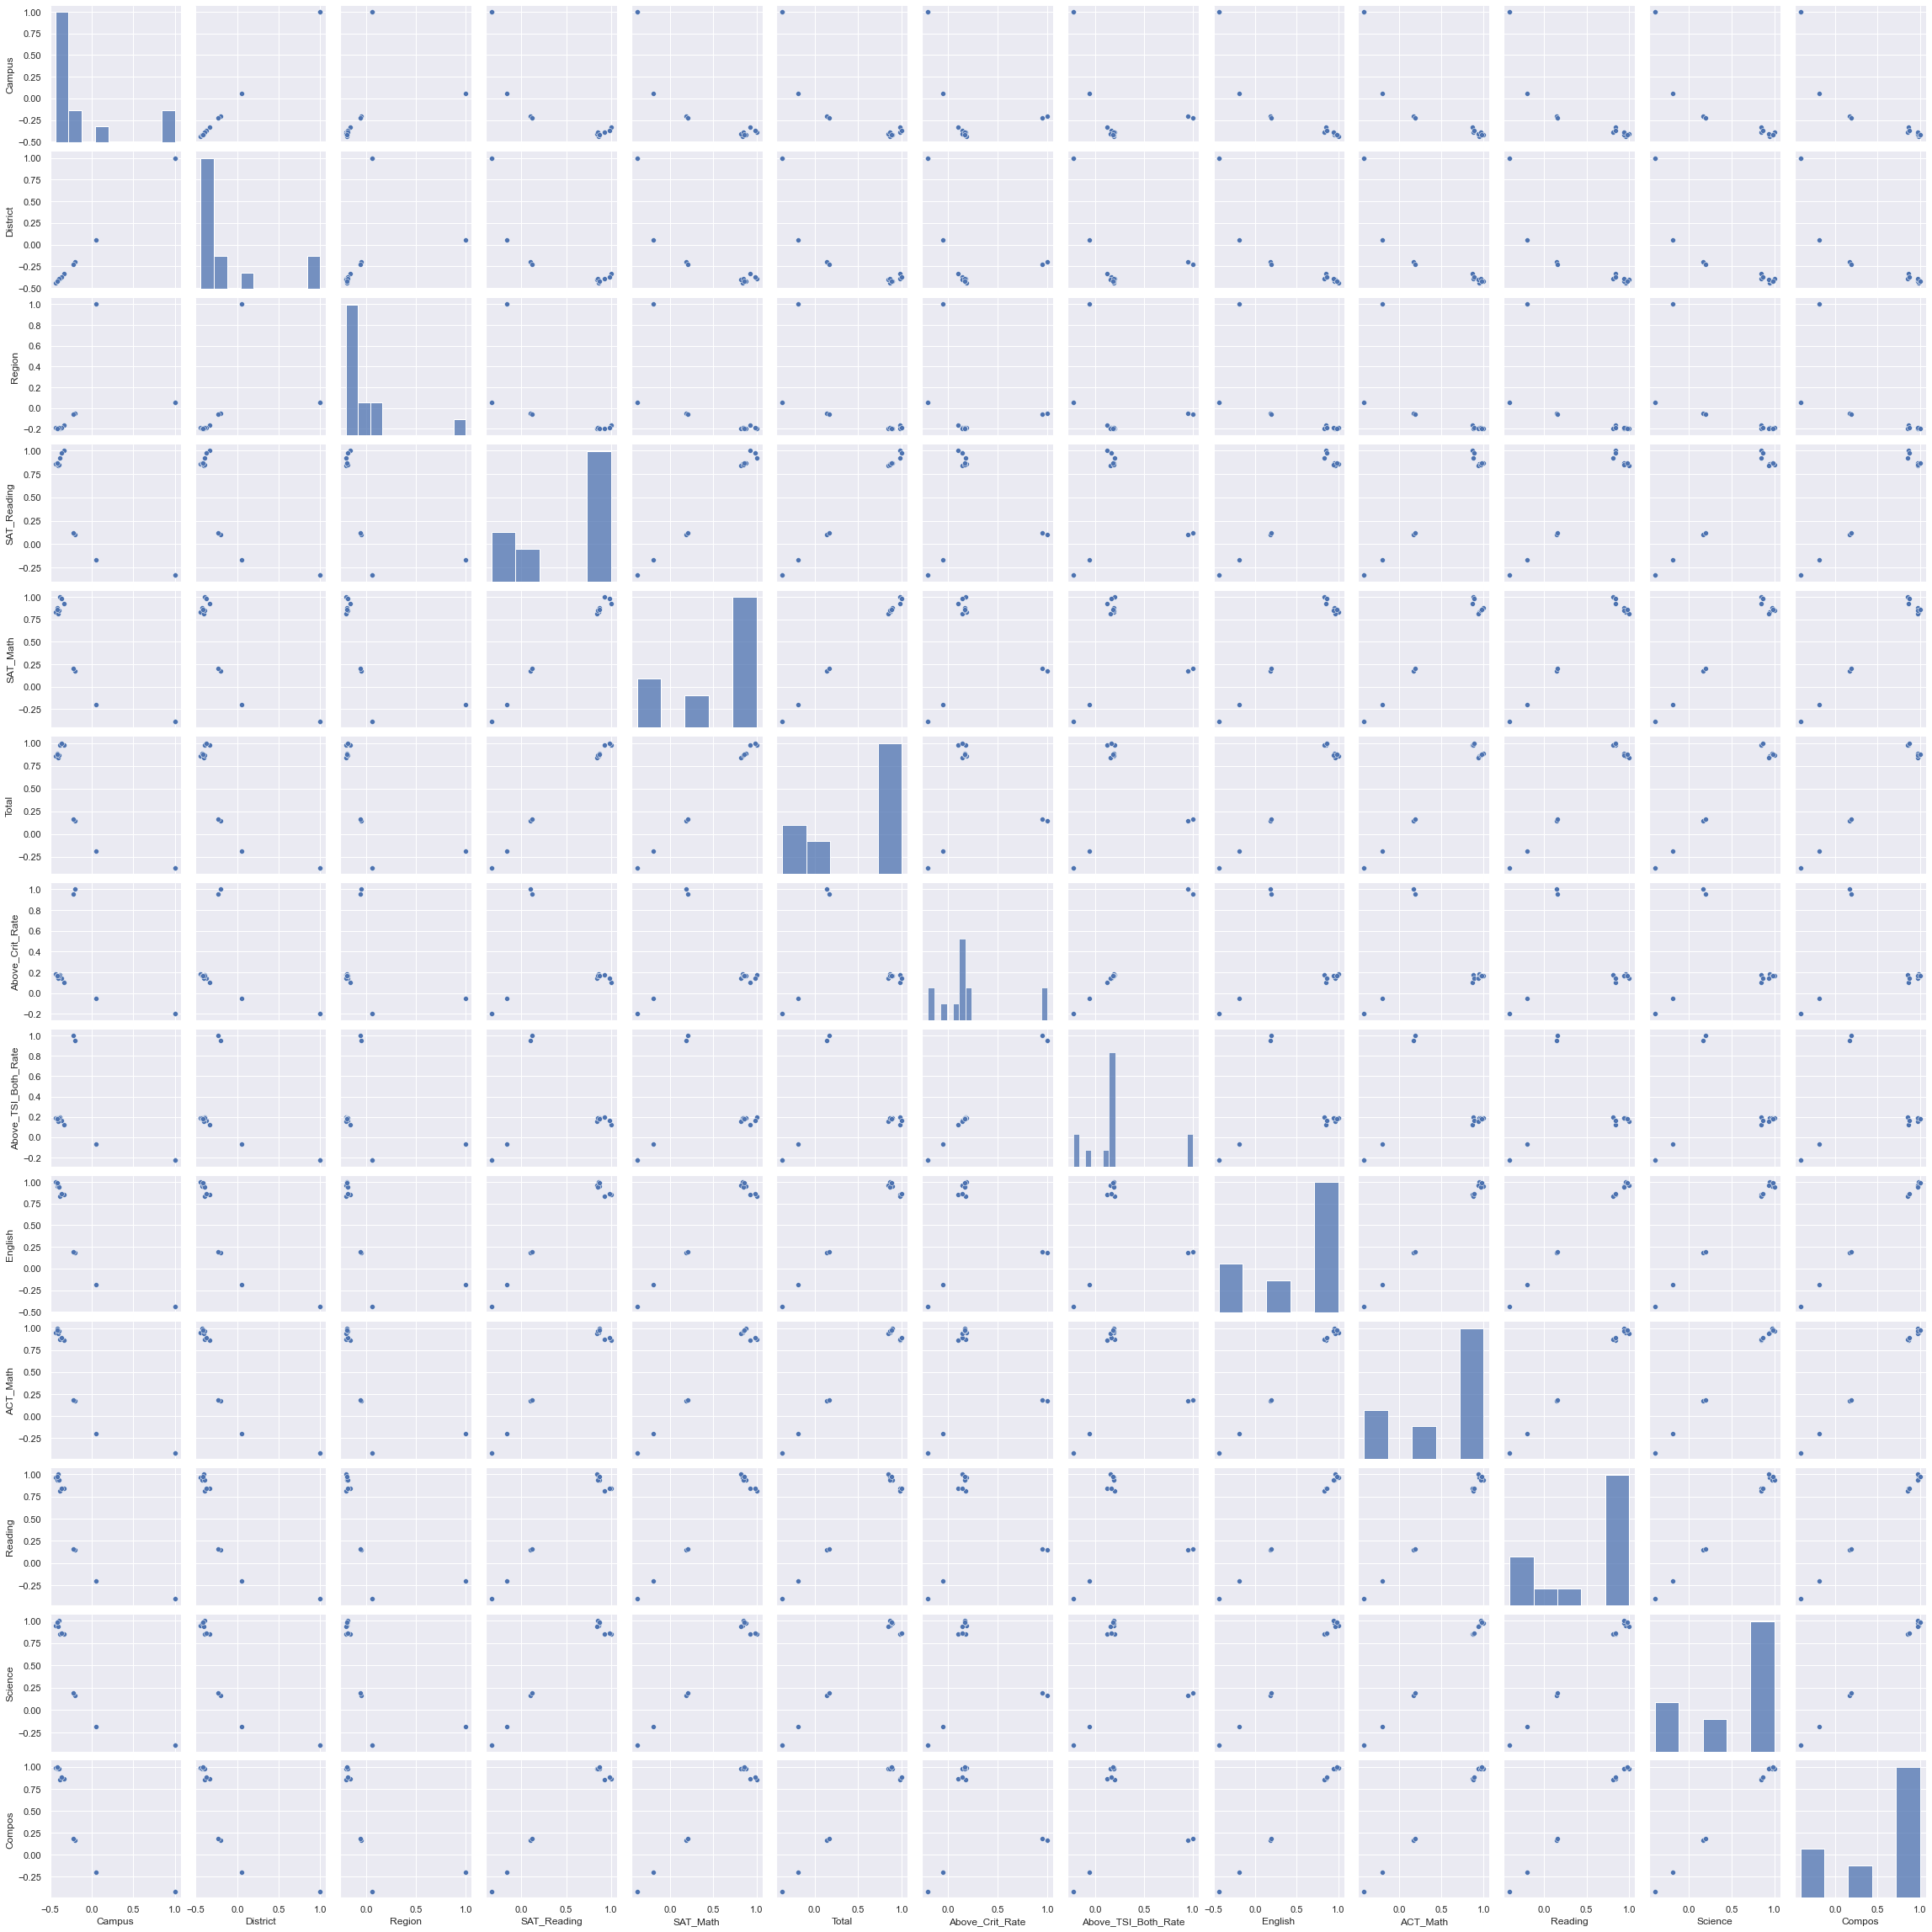

In [27]:
sns.pairplot(c)

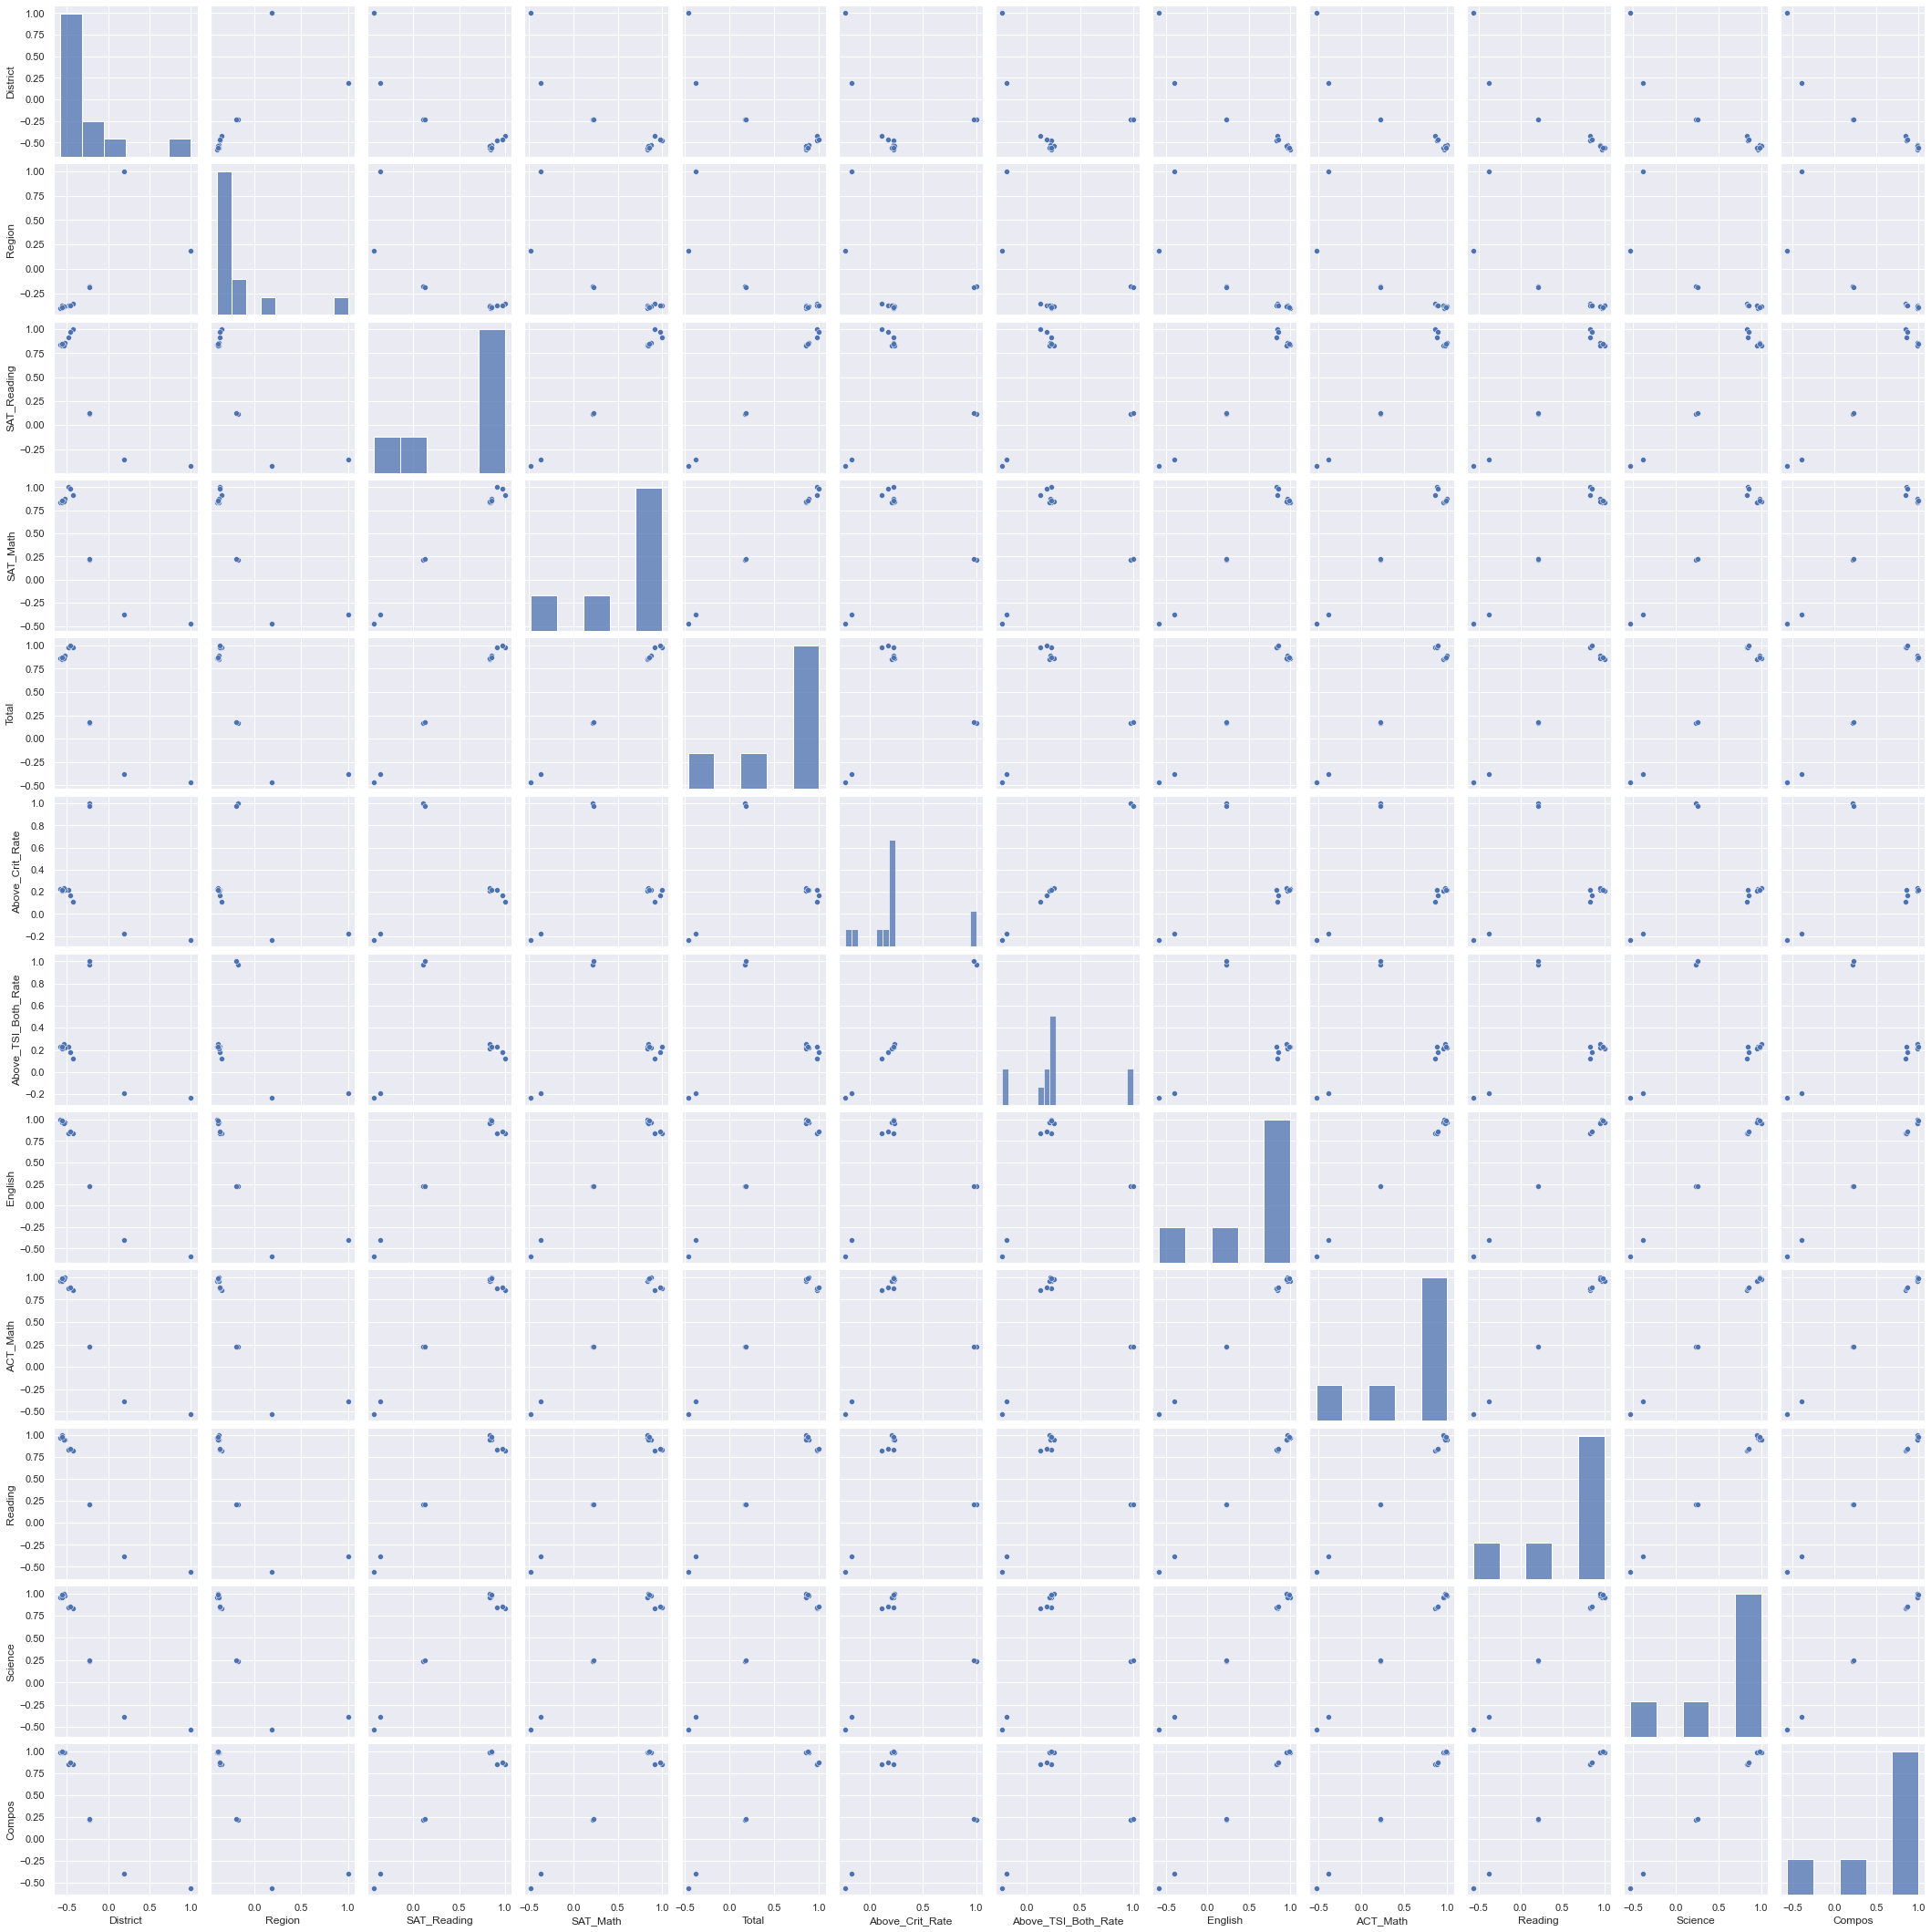

In [28]:
sns.pairplot(d)

# Visualize Graph

In [29]:
c.head()

,Campus,District,Region,SAT_Reading,SAT_Math,Total,Above_Crit_Rate,Above_TSI_Both_Rate,English,ACT_Math,Reading,Science,Compos
Campus,1.000000,1.000000,0.055332,-0.332445,-0.388457,-0.368455,-0.202369,-0.226361,-0.438692,-0.418441,-0.405456,-0.392011,-0.417446
District,1.000000,1.000000,0.055332,-0.332445,-0.388457,-0.368455,-0.202369,-0.226361,-0.438692,-0.418441,-0.405456,-0.392011,-0.417446
Region,0.055332,0.055332,1.000000,-0.165187,-0.201376,-0.187733,-0.051889,-0.063905,-0.191443,-0.198478,-0.202562,-0.187803,-0.196507
SAT_Reading,-0.332445,-0.332445,-0.165187,1.000000,0.922611,0.979166,0.099596,0.121266,0.857430,0.867368,0.838134,0.846688,0.868937
SAT_Math,-0.388457,-0.388457,-0.201376,0.922611,1.000000,0.981711,0.177757,0.197648,0.834824,0.875805,0.814037,0.847421,0.855988


In [30]:
d.head()

,District,Region,SAT_Reading,SAT_Math,Total,Above_Crit_Rate,Above_TSI_Both_Rate,English,ACT_Math,Reading,Science,Compos
District,1.000000,0.187070,-0.426021,-0.478505,-0.463356,-0.234769,-0.234409,-0.585297,-0.528799,-0.561241,-0.533899,-0.560897
Region,0.187070,1.000000,-0.355982,-0.375102,-0.374480,-0.174247,-0.190962,-0.399914,-0.384275,-0.379310,-0.387814,-0.391326
SAT_Reading,-0.426021,-0.355982,1.000000,0.912054,0.975836,0.112282,0.123955,0.840724,0.856573,0.828964,0.827657,0.850800
SAT_Math,-0.478505,-0.375102,0.912054,1.000000,0.979612,0.218050,0.225099,0.837398,0.875699,0.833898,0.845314,0.858440
Total,-0.463356,-0.374480,0.975836,0.979612,1.000000,0.171320,0.180794,0.858078,0.886305,0.850477,0.855975,0.874267


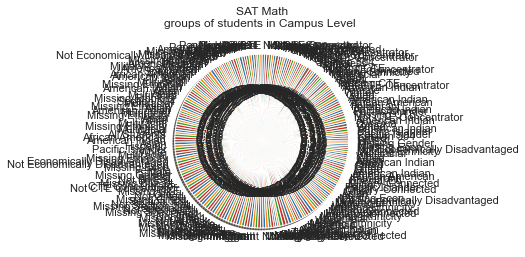

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
c =  pd.read_csv('c.csv')
group_data = c["Group"]
SAT_data = c["SAT_Math"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(SAT_data, labels=group_data, explode=None, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("SAT Math\n"+"groups of students in Campus Level ")
plt.show()

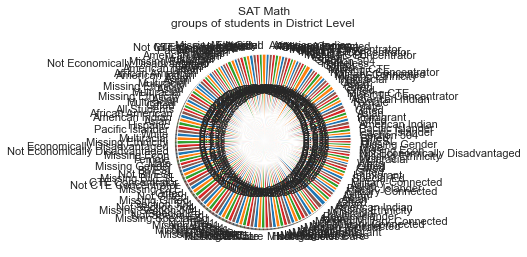

In [32]:
d =  pd.read_csv('d.csv')
group_data = d["Group"]
SAT_data = d["SAT_Math"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(SAT_data, labels=group_data, explode=None, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("SAT Math\n"+"groups of students in District Level ")
plt.show()

## Visualize ACT/SAT Math in District Level

In [33]:
np.std(d['SAT_Math'][0:50])

42.23091284829157

In [34]:
np.median(d['SAT_Math'][0:50])

630.0

In [35]:
d.SAT_Math.iloc[0:50].mean()

610.9

Text(0.5, 1.0, 'SAT Math Scores Across the District in Texas')

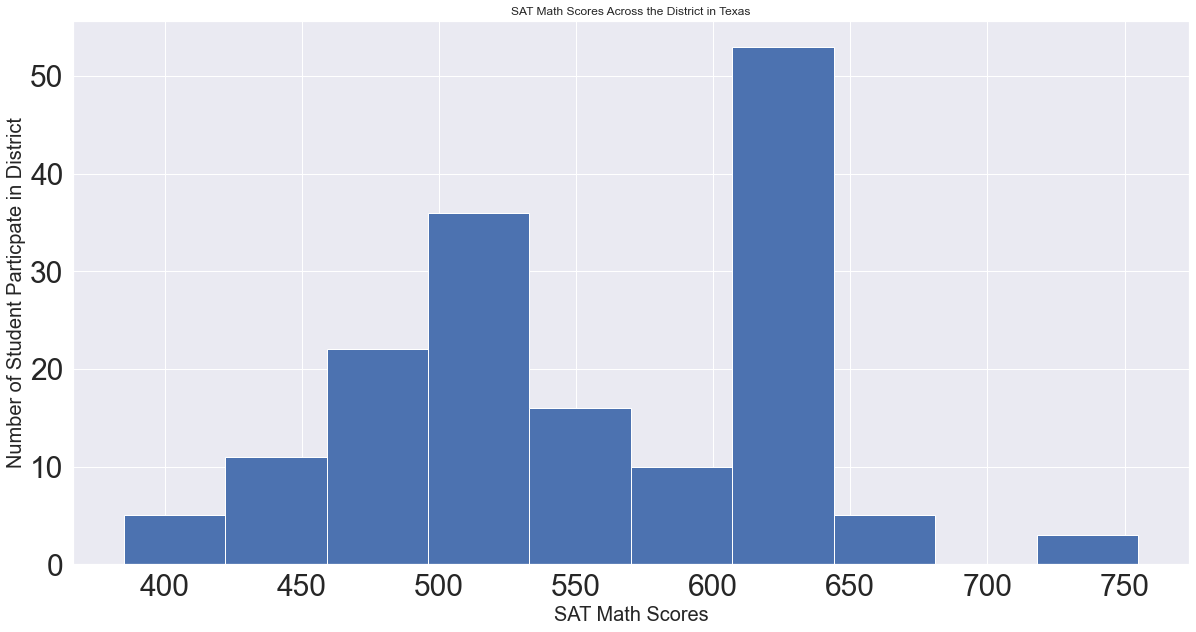

In [36]:
d.hist(column='SAT_Math', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=10)[0:50]
plt.xlabel('SAT Math Scores', fontsize=20)
plt.ylabel('Number of Student Particpate in District', fontsize=20)
plt.title('SAT Math Scores Across the District in Texas')

In [37]:
np.std(d['ACT_Math'][0:50])

2.5045366837002

In [38]:
np.median(d['ACT_Math'][0:50])

28.0

In [39]:
d.ACT_Math.iloc[0:50].mean()

26.764

Text(0.5, 1.0, 'ACT Math Scores Across the District in Texas')

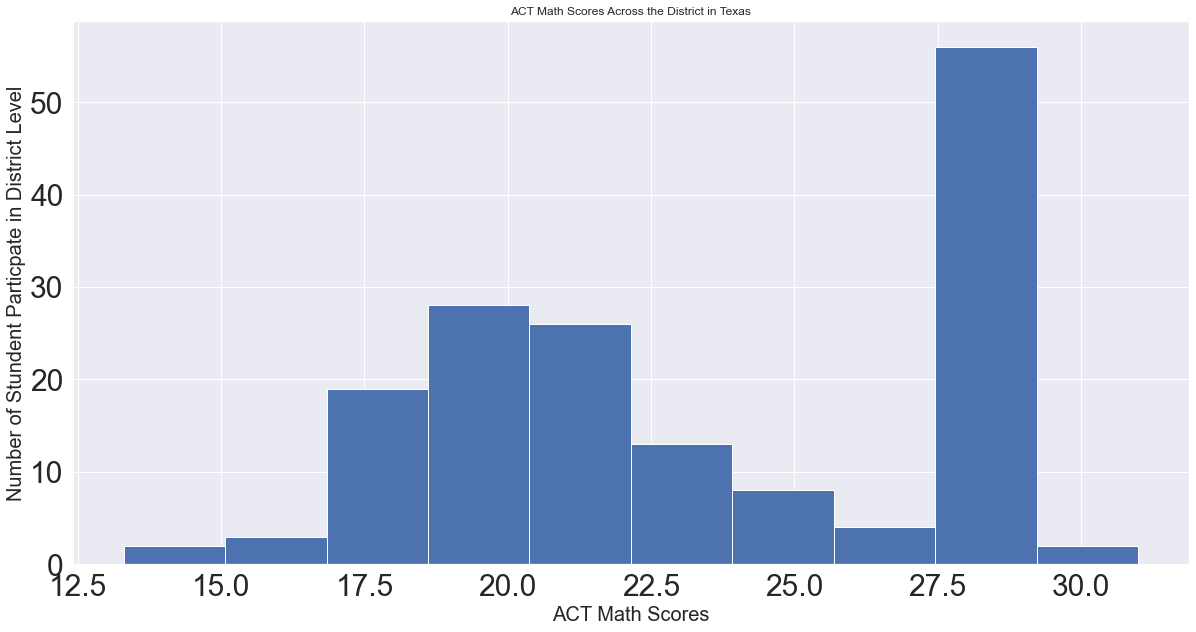

In [40]:
d.hist(column='ACT_Math', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=10)[0:50]
plt.xlabel('ACT Math Scores', fontsize=20)
plt.ylabel('Number of Stundent Particpate in District Level', fontsize=20)
plt.title('ACT Math Scores Across the District in Texas')

## Visual SAT/ACT Verbal in District Level 

In [41]:
np.std(d['SAT_Reading'][0:50])

37.65745078998312

In [42]:
np.median(d['SAT_Reading'][0:50])

643.0

In [43]:
d.SAT_Reading.iloc[0:50].mean()

626.58

<function matplotlib.pyplot.show(close=None, block=None)>

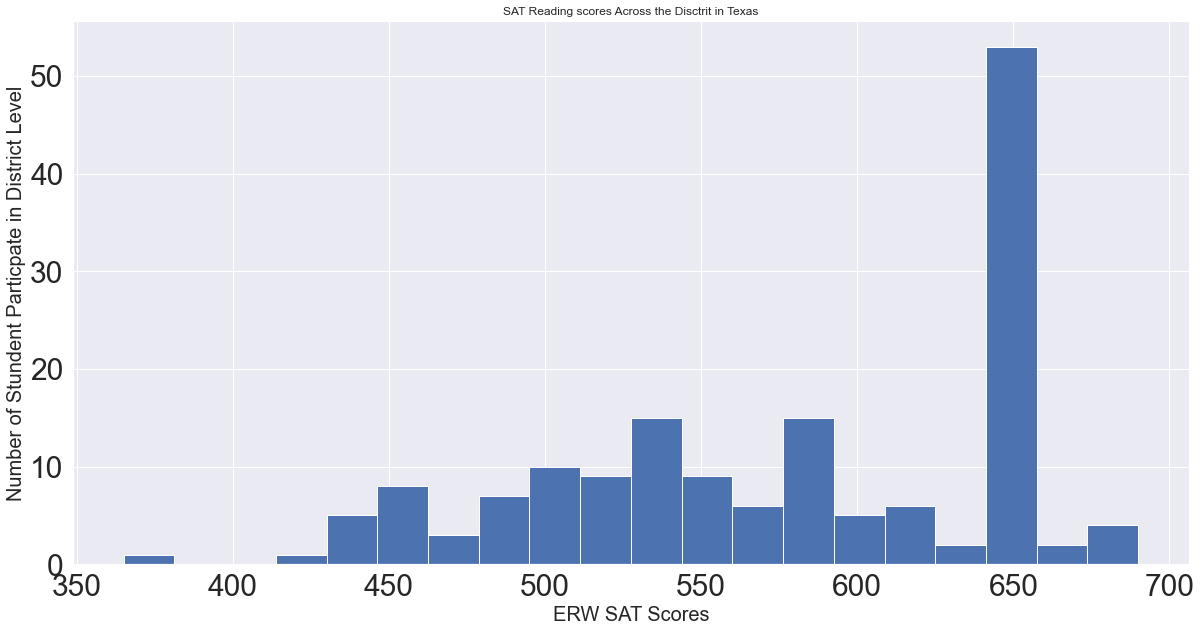

In [44]:
d.hist(column='SAT_Reading', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('ERW SAT Scores', fontsize=20)
plt.ylabel('Number of Stundent Particpate in District Level', fontsize=20)
plt.title('SAT Reading scores Across the Disctrit in Texas')
plt.show

In [45]:
np.std(d['Reading'][0:50])

3.020612520665306

In [46]:
np.median(d['Reading'][0:50])

32.0

In [47]:
d.Reading.iloc[0:50].mean()

30.71

<function matplotlib.pyplot.show(close=None, block=None)>

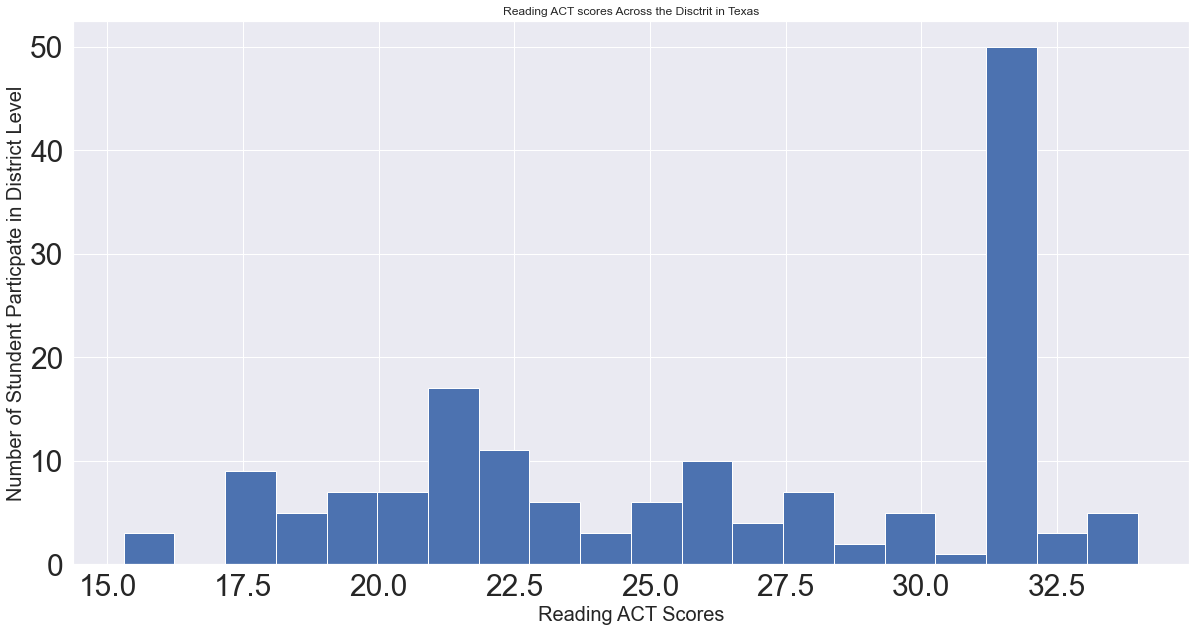

In [48]:
d.hist(column='Reading', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('Reading ACT Scores', fontsize=20)
plt.ylabel('Number of Stundent Particpate in District Level', fontsize=20)
plt.title('Reading ACT scores Across the Disctrit in Texas')
plt.show

## Visual ACT/SAT Math in Campus Level

In [49]:
np.std(c['SAT_Math'][0:50])

47.72665502630576

In [50]:
np.median(c['SAT_Math'][0:50])

625.0

In [51]:
c.SAT_Math.iloc[0:50].mean()

596.92

Text(0.5, 1.0, 'SAT Math Scores Across the Campus in Texas')

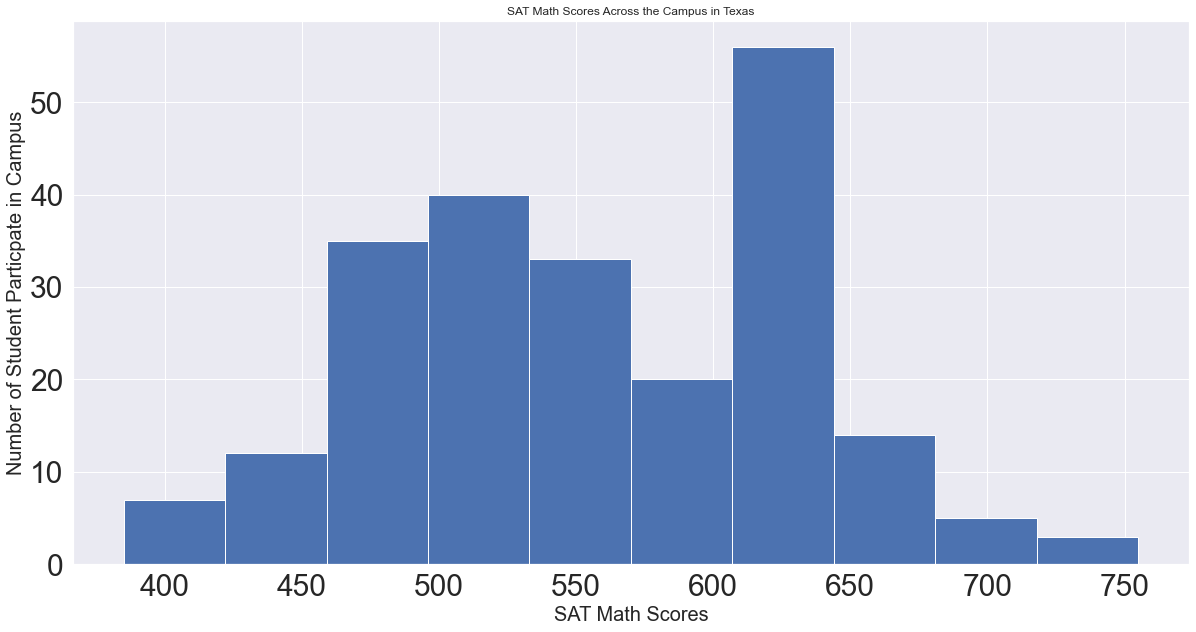

In [52]:
c.hist(column='SAT_Math', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=10)[0:50]
plt.xlabel('SAT Math Scores', fontsize=20)
plt.ylabel('Number of Student Particpate in Campus', fontsize=20)
plt.title('SAT Math Scores Across the Campus in Texas')

In [53]:
np.std(c['ACT_Math'][0:50])

2.8935099792466574

In [54]:
np.median(c['ACT_Math'][0:50])

28.0

In [55]:
c.ACT_Math.iloc[0:50].mean()

25.88

Text(0.5, 1.0, 'ACT Math Scores Across the Campus in Texas')

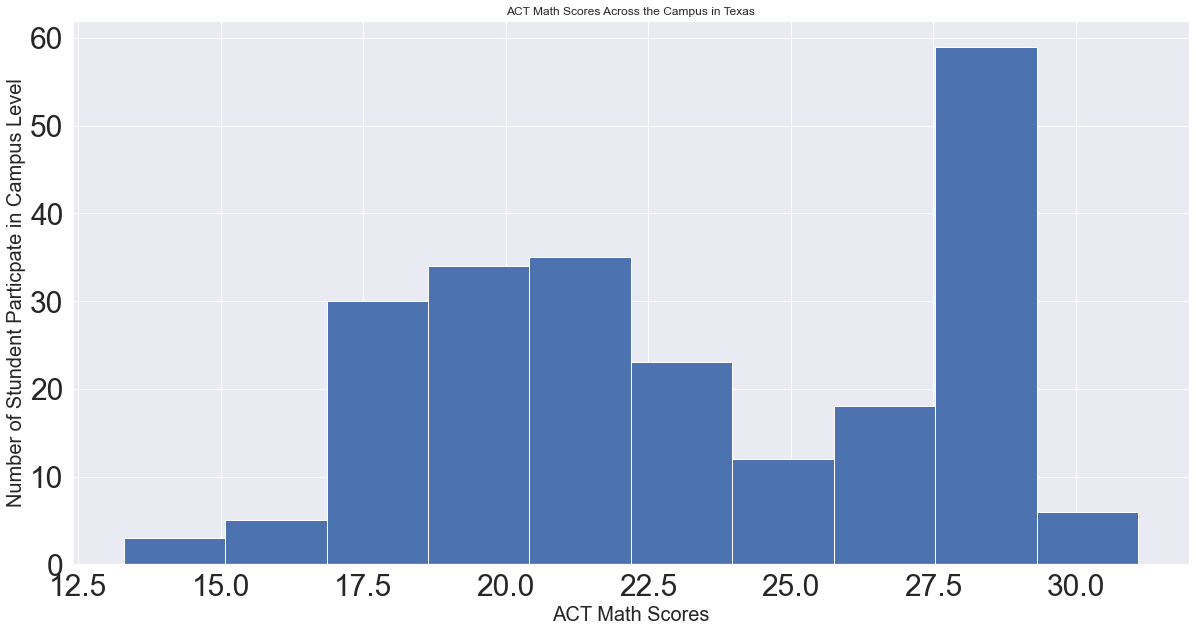

In [56]:
c.hist(column='ACT_Math', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=10)[0:50]
plt.xlabel('ACT Math Scores', fontsize=20)
plt.ylabel('Number of Stundent Particpate in Campus Level', fontsize=20)
plt.title('ACT Math Scores Across the Campus in Texas')

## Visual SAT/ACT Verbal in Campus Level

In [57]:
np.std(c['SAT_Reading'][0:50])

46.011928888061185

In [58]:
np.median(c['SAT_Reading'][0:50])

634.5

In [59]:
c.SAT_Reading.iloc[0:50].mean()

610.68

<function matplotlib.pyplot.show(close=None, block=None)>

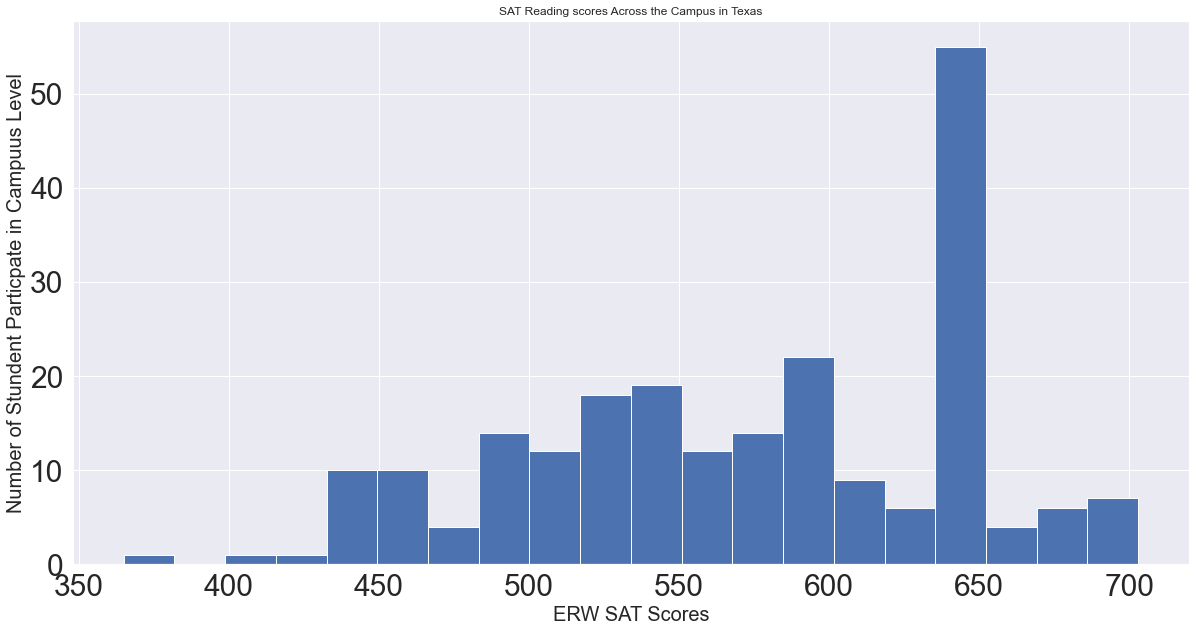

In [60]:
c.hist(column='SAT_Reading', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('ERW SAT Scores', fontsize=20)
plt.ylabel('Number of Stundent Particpate in Campuus Level', fontsize=20)
plt.title('SAT Reading scores Across the Campus in Texas')
plt.show

In [61]:
np.std(c['Reading'][0:50])

3.7205273819715394

In [62]:
np.median(c['Reading'][0:50])

30.0

In [63]:
c.Reading.iloc[0:50].mean()

29.074

<function matplotlib.pyplot.show(close=None, block=None)>

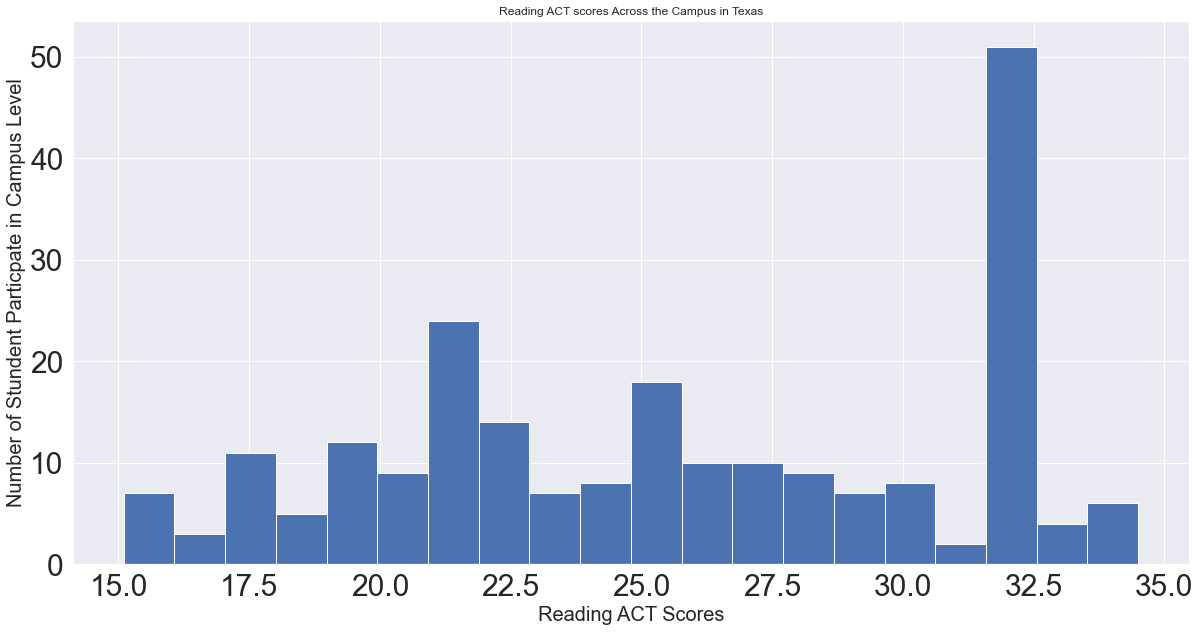

In [64]:
c.hist(column='Reading', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('Reading ACT Scores', fontsize=20)
plt.ylabel('Number of Stundent Particpate in Campus Level', fontsize=20)
plt.title('Reading ACT scores Across the Campus in Texas')
plt.show

# Finding Relationship in District Level

In [65]:
np.corrcoef(d['Total'],d['Compos'])

array([[1.        , 0.87426684],
       [0.87426684, 1.        ]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'ACT Composite Scores vs. SAT Total Scores in District Level')

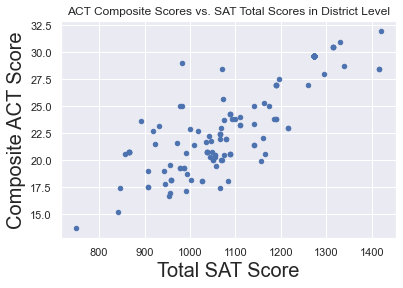

In [66]:
d.plot.scatter('Total', 'Compos')
plt.xlabel('Total SAT Score', fontsize=20)
plt.ylabel('Composite ACT Score', fontsize=20)
plt.title('ACT Composite Scores vs. SAT Total Scores in District Level')

# Finding Realtionship in Campus Level

In [67]:
c =  pd.read_csv('c.csv')

In [68]:
np.corrcoef(c['Total'],c['Compos'])

array([[1.        , 0.87951819],
       [0.87951819, 1.        ]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'ACT Composite Scores vs. SAT Total Scores Campus Student')

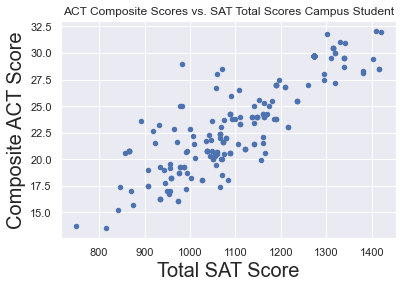

In [69]:
c.plot.scatter('Total', 'Compos')
plt.xlabel('Total SAT Score', fontsize=20)
plt.ylabel('Composite ACT Score', fontsize=20)
plt.title('ACT Composite Scores vs. SAT Total Scores Campus Student')

# Choose a color for a map 

In [70]:
import json
import requests
import branca.colormap as cm

In [72]:
#Choosing Set3_11 as the color for the Texas Map
cm.linear.Set3_11

In [95]:
cm.linear.Pastel2_08

# Map of Texas

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
import json
from folium.plugins import MarkerCluster
from branca.colormap import linear
import branca.colormap as cm
import ipyleaflet
from urllib.request import urlopen
import requests
import plotly.express as px

In [74]:
d=pd.read_csv('d.csv')
d.head()

,Group,District,Region,SAT_Reading,SAT_Math,Total,Above_Crit_Rate,Above_TSI_Both_Rate,English,ACT_Math,Reading,Science,Compos
0,Asian,2901,18,525.0,516.0,1041.0,100.0,100.0,20.8,21.6,23.5,22.7,22.3
1,Multiracial,13901,2,580.0,530.0,1110.0,33.3,33.3,25.0,21.7,25.7,21.0,23.3
2,Missing Ethnicity,13901,2,580.0,530.0,1110.0,33.3,33.3,25.0,21.7,25.7,21.0,23.3
3,Asian,14908,12,583.0,559.0,1142.0,100.0,100.0,22.8,25.2,25.7,25.6,25.0
4,Multiracial,17901,17,626.0,563.0,1189.0,100.0,100.0,22.8,22.4,25.6,23.9,23.8


In [75]:
print(d.shape)
print(d.info())

(161, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Group                161 non-null    object 
 1   District             161 non-null    int64  
 2   Region               161 non-null    int64  
 3   SAT_Reading          161 non-null    float64
 4   SAT_Math             161 non-null    float64
 5   Total                161 non-null    float64
 6   Above_Crit_Rate      161 non-null    float64
 7   Above_TSI_Both_Rate  161 non-null    float64
 8   English              161 non-null    float64
 9   ACT_Math             161 non-null    float64
 10  Reading              161 non-null    float64
 11  Science              161 non-null    float64
 12  Compos               161 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 16.5+ KB
None


In [76]:
url=("https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json")
d=d=pd.read_csv('d.csv')

In [77]:
response=urlopen(url)
geo_json_texas = json.loads(response.read())
d=d=pd.read_csv('d.csv')

chros_map_data = dict(zip(d['Region'].tolist(),d['Total'].tolist()))
for i in geo_json_texas['features']:
    i['id'] = i['properties']['geometry']
    
colormap = cm.StepColormap(colors=['gray', 'yellow', 'orange', 'green', 'blue', 'purple'], 
                           index=[min(choro_map_data.values()),
                                  np.percentile(list(choro_map_data.values()), 25),
                                  np.median(list(choro_map_data.values())),
                                  np.percentile(list(choro_map_data.values()), 75),
                                  300000,
                                  max(choro_map_data.values())],
                           vmin=5844,
                           vmax=954670)

# create choropleth layer
layer = ipyleaflet.Choropleth(geo_data=geo_json_data,
                              choro_data=choro_map_data,
                              # colormap=linear.YlOrRd_04,
                              colormap=colormap,
                              border_color='black',
                              style={'fillOpacity': 0.5, 'dashArray': '5, 5'})

# create map
in_counties_choropleth = ipyleaflet.Map(center=(39.78, -86.15), zoom=6)

# add choropleth layer
in_counties_choropleth.add_layer(layer)

# display color map legend
display(colormap)

# display map
display(in_counties_choropleth)



KeyError: 'geometry'

In [ ]:
url=("https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json")
d=d=pd.read_csv('d.csv')
c=c=pd.read_csv('c.csv')

In [80]:
d.dtypes

Group                   object
District                 int64
Region                   int64
SAT_Reading            float64
SAT_Math               float64
Total                  float64
Above_Crit_Rate        float64
Above_TSI_Both_Rate    float64
English                float64
ACT_Math               float64
Reading                float64
Science                float64
Compos                 float64
dtype: object

In [79]:
c.dtypes

Group                   object
Campus                   int64
District                 int64
Region                   int64
SAT_Reading            float64
SAT_Math               float64
Total                  float64
Above_Crit_Rate        float64
Above_TSI_Both_Rate    float64
English                float64
ACT_Math               float64
Reading                float64
Science                float64
Compos                 float64
dtype: object

In [78]:
test = d.loc[d['Group'] == 'Special Ed',d.columns.isin(['District','Group','Region','Total','Compos'])]
test.head()

,Group,District,Region,Total,Compos
36,Special Ed,39905,9,1273.0,29.7
81,Special Ed,61910,11,1110.0,24.0
131,Special Ed,167904,12,1045.0,20.3


In [81]:
testing = c.loc[c['Group'] == 'Special Ed',c.columns.isin(['District','Group','Region','Total','Compos'])]
testing.head()

,Group,District,Region,Total,Compos
49,Special Ed,39905,9,1273.0,29.7
114,Special Ed,61910,11,1110.0,24.0
179,Special Ed,167904,12,1045.0,20.3
205,Special Ed,221801,14,993.0,20.8
220,Special Ed,236902,6,965.0,22.9


In [82]:
test = d.loc[d['Group'] == 'Special Ed',d.columns.isin(['District','Group','Region','Total','Compos'])]
test.head()

,Group,District,Region,Total,Compos
36,Special Ed,39905,9,1273.0,29.7
81,Special Ed,61910,11,1110.0,24.0
131,Special Ed,167904,12,1045.0,20.3


In [83]:
tests = c.loc[c['Group'] == 'Special Ed',c.columns.isin(['District','Group','Region','Total','Compos'])]
tests.head()

,Group,District,Region,Total,Compos
49,Special Ed,39905,9,1273.0,29.7
114,Special Ed,61910,11,1110.0,24.0
179,Special Ed,167904,12,1045.0,20.3
205,Special Ed,221801,14,993.0,20.8
220,Special Ed,236902,6,965.0,22.9


In [84]:
testad = d.loc[d['Group'] == 'Special Ed',d.columns.isin(['District','Group','Region','Total','Compos','Above_Crit_Rate','Above_TSI_Both_Rate'])]
testad.head()

,Group,District,Region,Total,Above_Crit_Rate,Above_TSI_Both_Rate,Compos
36,Special Ed,39905,9,1273.0,100.0,100.0,29.7
81,Special Ed,61910,11,1110.0,50.0,50.0,24.0
131,Special Ed,167904,12,1045.0,100.0,100.0,20.3


In [85]:
testads = c.loc[c['Group'] == 'Special Ed',c.columns.isin(['District','Group','Region','Total','Compos','Above_Crit_Rate','Above_TSI_Both_Rate'])]
testads.head()

,Group,District,Region,Total,Above_Crit_Rate,Above_TSI_Both_Rate,Compos
49,Special Ed,39905,9,1273.0,100.0,100.0,29.7
114,Special Ed,61910,11,1110.0,50.0,50.0,24.0
179,Special Ed,167904,12,1045.0,100.0,100.0,20.3
205,Special Ed,221801,14,993.0,100.0,100.0,20.8
220,Special Ed,236902,6,965.0,100.0,100.0,22.9


In [86]:
d_d=pd.read_csv('d.csv')
with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json') as response:
    texas = json.load(response)

In [87]:
with urlopen('https://data-nces.opendata.arcgis.com/datasets/nces::public-school-locations-current-1.geojson?outSR=%7B%22latestWkid%22%3A4269%2C%22wkid%22%3A4269%7D') as response:
    tq = json.load(response)

In [88]:
d['District'] = d['District'].astype('str')
#center=get_center_latlong(d)

In [89]:
mp = folium.Map(location=[31,-100],default_zoom_start=15)
mp

In [90]:
mp.save(" mp.html ")

In [ ]:
mp = folium.Map([43, -100], zoom_start=4)
folium.GeoJson(tq).add_to(mp)

mp

In [ ]:
mp.save(" mp.html ")

In [ ]:
testad.head()

In [ ]:

testad = testad.dropna(subset=['Group','Total','Compos'])
testad.columns

In [ ]:
mp = folium.Map(location=[31,-100],zoom_start=6,titles='cartodbpositron')

choropleth = folium.Choropleth(
    geo_data = tq,
    name= 'choropleth',
    data = testad,
    columns = ['District', 'Compos','Total'],
    key_on = 'feature.properties',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'ACT and SAT total scores in District Level',
    highlight= True
 ).add_to(m)
   
folium.LayerControl(collapsed=True).add_to(mp)
mp